# 1. Import and setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up styling
sns.set(style="darkgrid")
sns.set_palette("flare")

print(sns.color_palette("flare").as_hex())
palette = sns.color_palette("flare").as_hex()
sns.color_palette("flare")

['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']


[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [3]:
RANDOM_STATE=42

# 2. Read dataset

In [4]:
df = pd.read_csv('../dataset/icd_final_27th_Oct.csv', index_col=0)
df.head()

hadm_id  alcoholism gender  anchor_age            deathtime  \
0  23260768           0      F          60                  NaN   
1  23059383           0      F          72  2147-11-06T18:30:00   
2  20779074           0      F          88                  NaN   
3  20772091           0      M          34  2179-02-25T16:08:00   
4  21453368           0      F          38  2133-04-05T10:20:00   

   hematocrit_serum  blood_urea_nitrogen  serum_creatinine  \
0              21.9                 24.0               1.2   
1              34.3                 29.0               1.3   
2              33.6                 18.0               1.1   
3              30.7                 13.0               0.5   
4              25.7                 24.0               0.9   

   Non_Invasive_Blood_Pressure_systolic  \
0                                 142.0   
1                                  55.0   
2                                 130.0   
3                                 112.0   
4                                 176.0   

   Non_Invasive_Blood_Pressure_diastolic  ...  white_bloodcells  \
0                                   75.0  ...              10.7   
1                                   32.0  ...              14.3   
2                                   62.0  ...              12.1   
3                                   66.0  ...               6.7   
4                                  106.0  ...               0.1   

   Glucose_serum  platelet_PLT  Prothrombin_time  aminotransferase_ALT  \
0          121.0         411.0              14.0                  10.0   
1          242.0         116.0              18.2                 740.0   
2           93.0         224.0              16.4                  17.0   
3          148.0         372.0              11.2                  26.0   
4           84.0          41.0              18.9                  32.0   

   Total_Bilirubin  Anion_gap  Heart_rate_Alarm_High  Heart_rate_Alarm_low  \
0              0.6       14.0                  120.0                  50.0   
1              2.2       18.0                  130.0                  50.0   
2              0.5       14.0                  130.0                  50.0   
3              0.1       10.0                  150.0                  50.0   
4              1.2       16.0                  120.0                  60.0   

   earliest_weight_kg  
0                60.5  
1                65.0  
2                59.7  
3                64.0  
4                92.0  

[5 rows x 21 columns]

In [5]:
# Label mortality
df['mortality'] = df['deathtime'].apply(lambda x: 'Survive' if x is np.nan else 'Dead')
df['mortality'].value_counts()

mortality
Survive    373
Dead        81
Name: count, dtype: int64

In [6]:
df.columns

Index(['hadm_id', 'alcoholism', 'gender', 'anchor_age', 'deathtime',
       'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
       'Non_Invasive_Blood_Pressure_systolic',
       'Non_Invasive_Blood_Pressure_diastolic', 'lipase', 'white_bloodcells',
       'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
       'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap',
       'Heart_rate_Alarm_High', 'Heart_rate_Alarm_low', 'earliest_weight_kg',
       'mortality'],
      dtype='object')

# 3. Exploratory Data

## 3.1. General Statistics

In [7]:
df.shape

(454, 22)

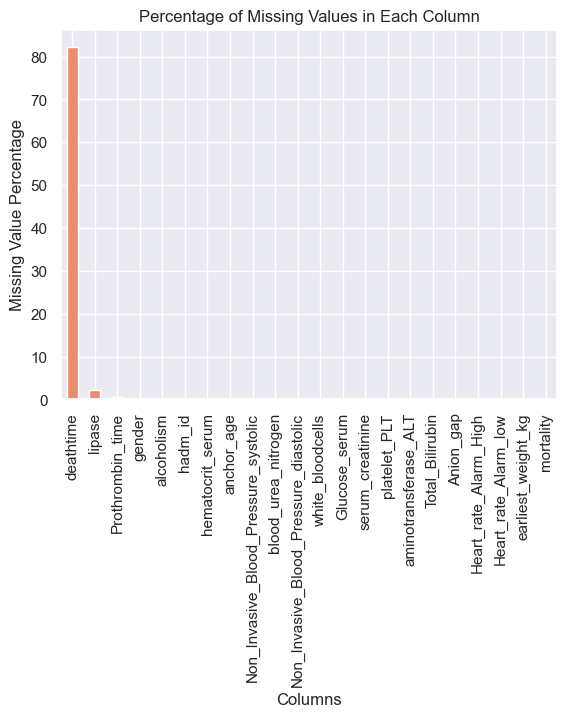

In [8]:
# Datatype and missing value information
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
    
missing_percentage.sort_values(ascending=False).plot(kind='bar', color=palette[0])
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

In [9]:
missing_columns = missing_percentage.sort_values(ascending=False)[:10]
missing_columns

deathtime                               82.158590
lipase                                   2.202643
Prothrombin_time                         0.660793
gender                                   0.000000
alcoholism                               0.000000
hadm_id                                  0.000000
hematocrit_serum                         0.000000
anchor_age                               0.000000
Non_Invasive_Blood_Pressure_systolic     0.000000
blood_urea_nitrogen                      0.000000
dtype: float64

Missing values are on `deathtime` (80%), `lipase` (2.2%), and `Prothrombin_time` (0.3%). NaN values in `deathtime` contain information of moratlity. Missing values in `Prothrombin_time` and `lipase` is less than 5%, so we keep it.

In [10]:
df_clean = df
df_clean.head()

hadm_id  alcoholism gender  anchor_age            deathtime  \
0  23260768           0      F          60                  NaN   
1  23059383           0      F          72  2147-11-06T18:30:00   
2  20779074           0      F          88                  NaN   
3  20772091           0      M          34  2179-02-25T16:08:00   
4  21453368           0      F          38  2133-04-05T10:20:00   

   hematocrit_serum  blood_urea_nitrogen  serum_creatinine  \
0              21.9                 24.0               1.2   
1              34.3                 29.0               1.3   
2              33.6                 18.0               1.1   
3              30.7                 13.0               0.5   
4              25.7                 24.0               0.9   

   Non_Invasive_Blood_Pressure_systolic  \
0                                 142.0   
1                                  55.0   
2                                 130.0   
3                                 112.0   
4                                 176.0   

   Non_Invasive_Blood_Pressure_diastolic  ...  Glucose_serum  platelet_PLT  \
0                                   75.0  ...          121.0         411.0   
1                                   32.0  ...          242.0         116.0   
2                                   62.0  ...           93.0         224.0   
3                                   66.0  ...          148.0         372.0   
4                                  106.0  ...           84.0          41.0   

   Prothrombin_time  aminotransferase_ALT  Total_Bilirubin  Anion_gap  \
0              14.0                  10.0              0.6       14.0   
1              18.2                 740.0              2.2       18.0   
2              16.4                  17.0              0.5       14.0   
3              11.2                  26.0              0.1       10.0   
4              18.9                  32.0              1.2       16.0   

   Heart_rate_Alarm_High  Heart_rate_Alarm_low  earliest_weight_kg  mortality  
0                  120.0                  50.0                60.5    Survive  
1                  130.0                  50.0                65.0       Dead  
2                  130.0                  50.0                59.7    Survive  
3                  150.0                  50.0                64.0       Dead  
4                  120.0                  60.0                92.0       Dead  

[5 rows x 22 columns]

In [11]:
(df_clean.isnull().sum(axis=1) / df_clean.shape[1]).value_counts().sort_index()

0.000000     68
0.045455    386
Name: count, dtype: int64

There is no record with more than 5% missing values.

In [12]:
# Statistical description of numerical features
df_clean.describe(include=[np.number]).round(2)

hadm_id  alcoholism  anchor_age  hematocrit_serum  \
count       454.00      454.00      454.00            454.00   
mean   24933999.80        0.22       58.60             33.83   
std     2897739.39        0.41       17.23              7.17   
min    20009550.00        0.00       22.00             16.00   
25%    22386114.50        0.00       46.25             28.70   
50%    25102125.00        0.00       57.50             33.00   
75%    27559023.00        0.00       72.00             38.38   
max    29966638.00        1.00       91.00             56.50   

       blood_urea_nitrogen  serum_creatinine  \
count               454.00            454.00   
mean                 29.54              1.66   
std                  25.10              1.71   
min                   3.00              0.10   
25%                  13.00              0.70   
50%                  22.00              1.10   
75%                  37.00              1.80   
max                 173.00             14.40   

       Non_Invasive_Blood_Pressure_systolic  \
count                                454.00   
mean                                 128.64   
std                                   26.53   
min                                   55.00   
25%                                  110.00   
50%                                  127.00   
75%                                  146.00   
max                                  222.00   

       Non_Invasive_Blood_Pressure_diastolic   lipase  white_bloodcells  \
count                                 454.00   444.00            454.00   
mean                                   73.23   603.17             13.88   
std                                    19.98   945.91              8.83   
min                                    12.00     5.00              0.10   
25%                                    59.00    57.75              8.40   
50%                                    71.50   210.00             12.05   
75%                                    84.00   772.25             17.85   
max                                   134.00  6095.00             77.80   

       Glucose_serum  platelet_PLT  Prothrombin_time  aminotransferase_ALT  \
count         454.00        454.00            451.00                 454.0   
mean          159.63        227.47             17.16                 226.8   
std           126.40        140.31              9.44                 798.9   
min            35.00         10.00              8.80                   2.0   
25%           102.00        129.25             13.00                  24.0   
50%           126.00        199.50             14.40                  51.0   
75%           178.00        286.75             17.05                 150.0   
max          1638.00        942.00             93.20                9582.0   

       Total_Bilirubin  Anion_gap  Heart_rate_Alarm_High  \
count           454.00     454.00                 454.00   
mean              2.77      16.19                 124.06   
std               5.23       5.57                  10.69   
min               0.10       5.00                  50.00   
25%               0.50      13.00                 120.00   
50%               1.00      15.00                 120.00   
75%               2.80      18.00                 130.00   
max              46.50      49.00                 180.00   

       Heart_rate_Alarm_low  earliest_weight_kg  
count                454.00              454.00  
mean                  54.46               84.62  
std                    8.10               23.20  
min                   20.00               32.00  
25%                   50.00               68.75  
50%                   50.00               80.50  
75%                   60.00               98.20  
max                  135.00              168.20

In [13]:
# Statistical description of categorical features
df_clean.describe(include=[np.object_])

gender            deathtime mortality
count     454                   81       454
unique      2                   81         2
top         M  2118-07-07T01:40:00   Survive
freq      266                    1       373

In [14]:
# Number of distinct patients
print('Number of distinct patients: ', df_clean.hadm_id.unique().shape[0])
print('Number of duplication', len(df_clean[df_clean.duplicated()]))

Number of distinct patients:  454
Number of duplication 0


In [15]:
df_clean.columns

Index(['hadm_id', 'alcoholism', 'gender', 'anchor_age', 'deathtime',
       'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
       'Non_Invasive_Blood_Pressure_systolic',
       'Non_Invasive_Blood_Pressure_diastolic', 'lipase', 'white_bloodcells',
       'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
       'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap',
       'Heart_rate_Alarm_High', 'Heart_rate_Alarm_low', 'earliest_weight_kg',
       'mortality'],
      dtype='object')

In [16]:
features_kde = ['hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
                'Non_Invasive_Blood_Pressure_systolic',
                'Non_Invasive_Blood_Pressure_diastolic', 'white_bloodcells',
                'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
                'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap',
                'Heart_rate_Alarm_High', 'Heart_rate_Alarm_low', 'earliest_weight_kg']

## 3.2.  Univariate analysis

#### Distribution of Gender

In [17]:
# Distribution of gender
gender_counts = df['gender'].value_counts()
gender_counts

gender
M    266
F    188
Name: count, dtype: int64

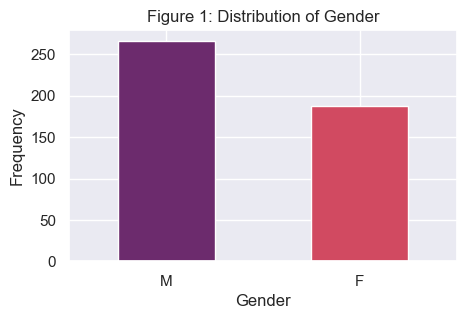

In [18]:
plt.figure(figsize=(5,3))
gender_counts.plot(kind='bar', title='Figure 1: Distribution of Gender', xlabel='Gender', ylabel='Frequency',
                   rot=0, color=[palette[-1], palette[-4]])
plt.show()

The distribution of gender is balanced.

#### Alcoholism

In [19]:
# Distribution of comorbidity index
alc_counts = df_clean['alcoholism'].value_counts()
alc_counts

alcoholism
0    355
1     99
Name: count, dtype: int64

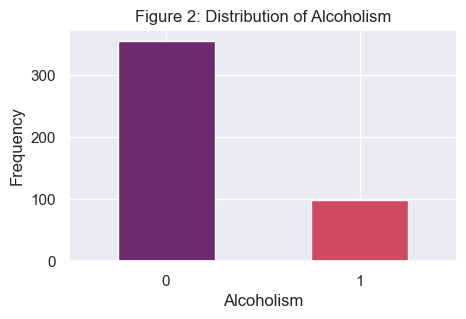

In [20]:
plt.figure(figsize=(5,3))
alc_counts.plot(kind='bar', title='Figure 2: Distribution of Alcoholism', xlabel='Alcoholism', ylabel='Frequency',
                   rot=0, color=[palette[-1], palette[-4]])
plt.show()

Most patients are non-alcoholism with 21.8% only.

#### Anchor age

In [22]:
# Group age by 10 years
bins = list(range(20, 101, 10))
age_groups = pd.cut(df_clean['anchor_age'], bins=bins, right=False)
ageg_counts = age_groups.value_counts().sort_index()

# Grouped age counts
print(ageg_counts)

anchor_age
[20, 30)     19
[30, 40)     48
[40, 50)     77
[50, 60)     98
[60, 70)     82
[70, 80)     62
[80, 90)     53
[90, 100)    15
Name: count, dtype: int64


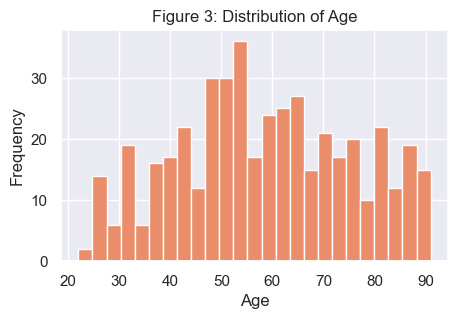

In [23]:
plt.figure(figsize=(5,3))
df_clean['anchor_age'].plot(kind='hist', title='Figure 3: Distribution of Age',ylabel='Frequency',
                      rot=0, bins=25).set_xlabel('Age')
plt.show()

Patients are mostly on their 40-70.

#### Date of death

In [24]:
# Distribution of date of death
dod_counts = df['deathtime'].value_counts(dropna=False)
dod_counts[:10]

deathtime
NaN                    373
2117-03-16T01:55:00      1
2144-08-18T04:25:00      1
2149-05-28T17:00:00      1
2146-12-03T16:15:00      1
2125-02-26T15:05:00      1
2145-08-22T08:54:00      1
2153-03-02T04:30:00      1
2162-08-02T13:10:00      1
2181-05-03T09:30:00      1
Name: count, dtype: int64

In [25]:
print("Number of patients survived is", len(df[df.mortality == 'Survive']))
print(f"Mortality rate is {round(100* len(df[df.mortality == 'Dead']) / len(df),2)}%")

Number of patients survived is 373
Mortality rate is 17.84%


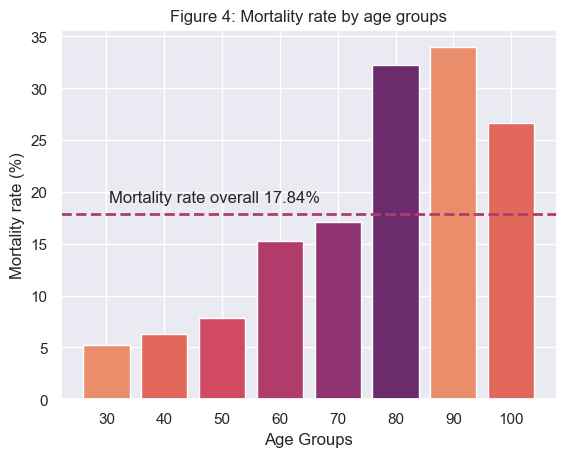

In [29]:
# Mortality rate in each age groups
rate_age = pd.DataFrame(zip(df['mortality'], age_groups), columns=['mortality', 'age_groups'])
total = rate_age.groupby(['age_groups']).count()
rate = pd.DataFrame(rate_age.groupby(['age_groups', 'mortality']).size()).reset_index().drop_duplicates(subset=['age_groups'], keep="first")
mortality_rate = 100 * rate.iloc[:,2].values / total.values[:,0]

plt.bar(["30", "40", "50", "60", "70", "80", "90", "100"], mortality_rate, color=palette)
plt.axhline(y=round(100* len(df[df.mortality == 'Dead']) / len(df),2), color=palette[3], linestyle='--', linewidth=2, label='Mortality rate')
plt.annotate('Mortality rate overall 17.84%', xy=(0, 20), xytext=(0.05, 19))

plt.xlabel("Age Groups")
plt.ylabel("Mortality rate (%)")
plt.title("Figure 4: Mortality rate by age groups")

plt.show()

Mortality rate drawn from sample is 17.84% with the highest rate being in the older people aged more than 70.

#### Others

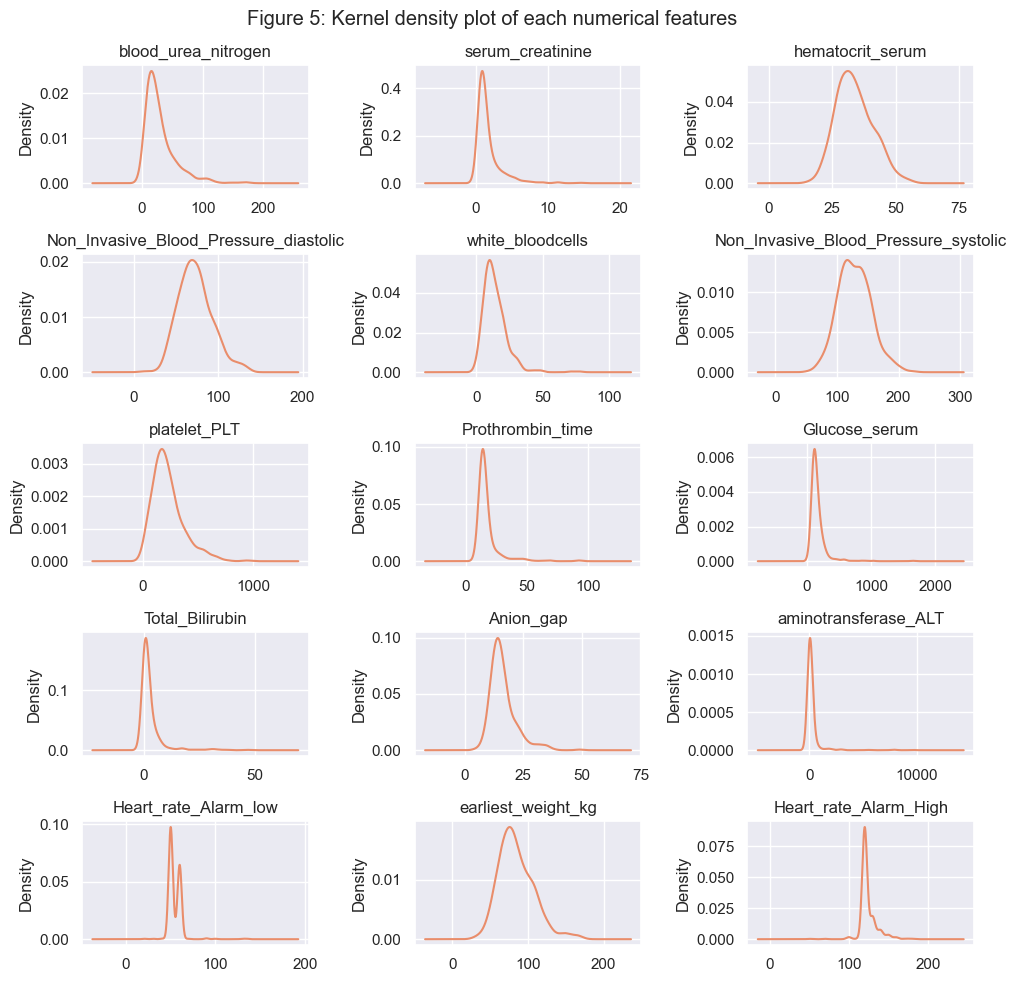

In [30]:
fig, axes = plt.subplots(5,3, figsize=(10,10))

for i, col in enumerate(features_kde):
    df_clean[col].plot(ax=axes[i//3, i%3-1], kind='kde', title=col)
    
plt.suptitle("Figure 5: Kernel density plot of each numerical features")
plt.tight_layout()
plt.show()

The distribution of the numerical dataset is positive skewed with `Heart_rate_Alarm_low` and `Heart_rate_Alarm_High` being bimodal.

## 3.3. Multivariate analysis

#### Helper function

In [31]:
"""
Plots histogram and boxplot to compare difference in distribution of given label
- label: the feature to be compared
- title: title of the figure
"""
def plot_mean_difference(df, label, title, colours):
    fig, axes = plt.subplots(2, len(features_kde), figsize=(30, 7))
    value = df[label].unique()
    p_vals = []

    for i in range(len(features_kde)):
        feature = features_kde[i]
        for j, val in enumerate(df[label].unique()):
            sns.kdeplot(df[df[label] == val][feature], ax=axes[0, i], fill=True, label=val, color=colours[j])
        axes[0, i].set(ylabel=None)
        axes[0, i].set(xlabel=None)
        axes[0, i].set_title(feature)

        sns.boxplot(ax=axes[1, i], x=label, y=feature, data=df, palette=colours)
        axes[1, i].set(ylabel=None)
        axes[1, i].set(xlabel=None)
        
        t_statistic, p_value = ttest_ind(df[df[label] == value[0]][feature].dropna(),
                                 df[df[label] == value[1]][feature].dropna())
        p_vals.append(p_value)
    axes[0,-1].legend(title=label)

    fig.suptitle(title)
    plt.show()
    return dict(zip(features_kde, p_vals))

"""
Plot coefficient correlation inside a pair plot, used in pair_plot function
"""
def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    marker_size = abs(r) * 10000
    ax.scatter([.5], [.5], marker_size, [r], alpha=0.6, cmap="flare",
            vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

"""
Plot pair grid of bivariate analysis, includes scatter plot and correlation computation
- df: dataframe containing all features
- label: the feature to be compared
- title: title of figure
"""
def pair_plot(df, label, title, colours):
    g = sns.PairGrid(df, hue=label, diag_sharey=False, palette=colours)
    g.map_upper(reg_coef, hue=None)
    g.map_diag(sns.kdeplot, fill=True)
    g.map_lower(sns.scatterplot)

    g.add_legend(adjust_subtitles=True, title=label)
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle(title)

    plt.show()

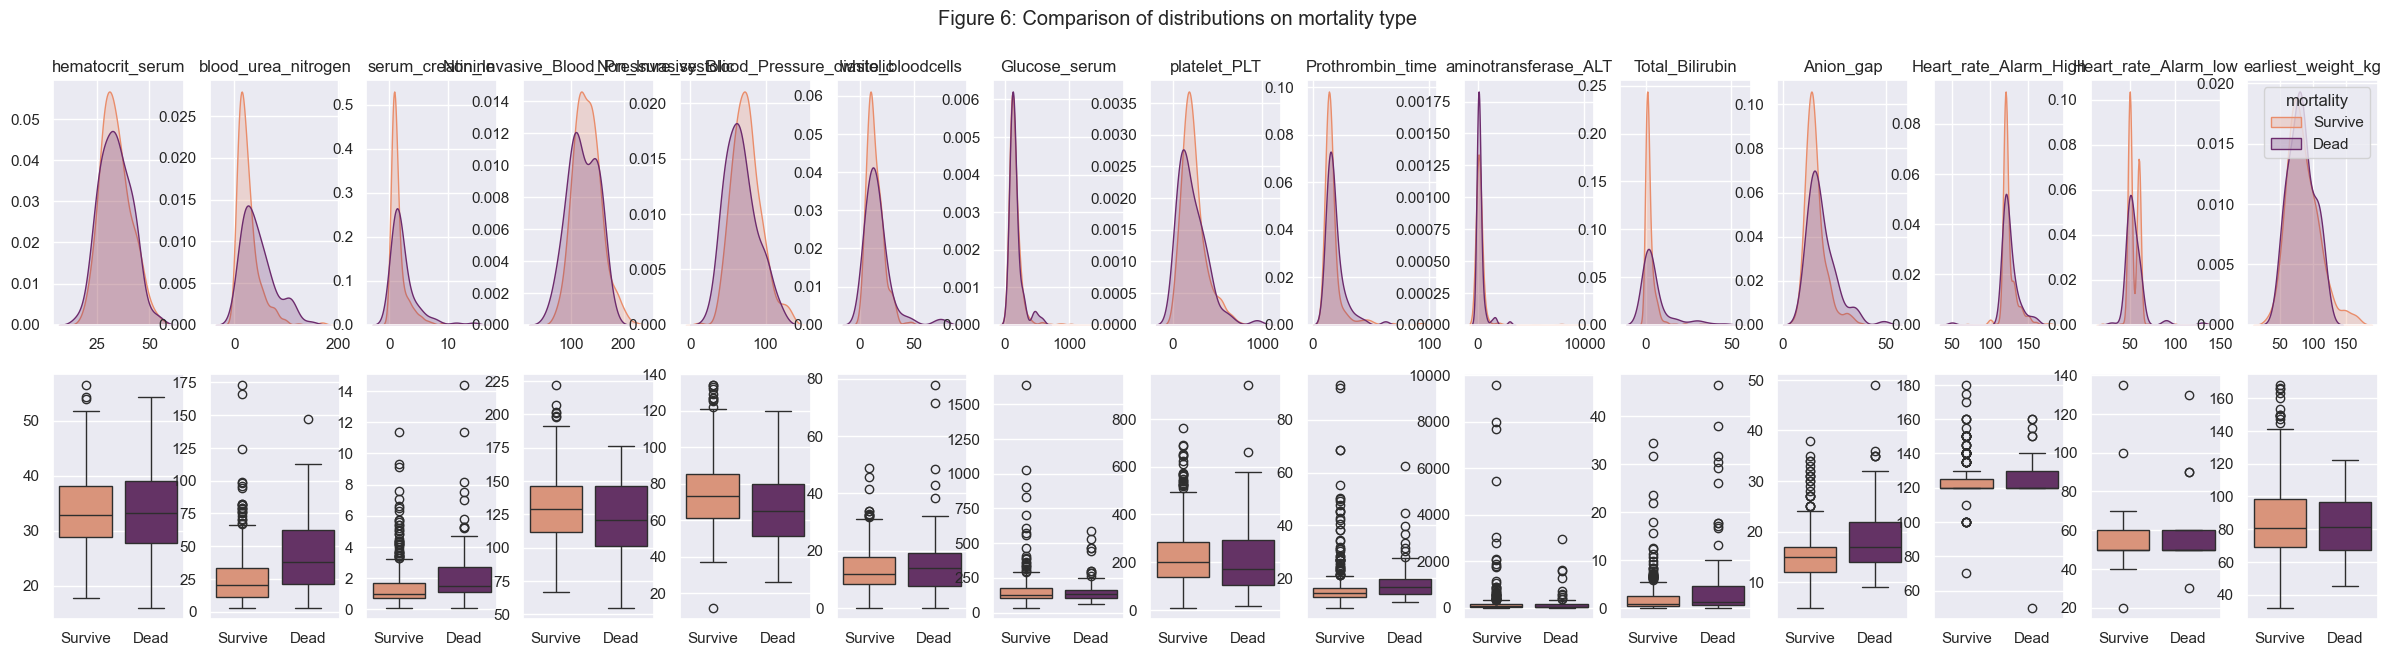

{'hematocrit_serum': 0.7824666784773056,
 'blood_urea_nitrogen': 1.3021996724460036e-10,
 'serum_creatinine': 0.00010011037827196977,
 'Non_Invasive_Blood_Pressure_systolic': 0.008593174735743484,
 'Non_Invasive_Blood_Pressure_diastolic': 0.0018878574734778684,
 'white_bloodcells': 0.02829810079213095,
 'Glucose_serum': 0.8607660440051035,
 'platelet_PLT': 0.3413424106811156,
 'Prothrombin_time': 0.10653841780823349,
 'aminotransferase_ALT': 0.6781553877693431,
 'Total_Bilirubin': 1.097324341880995e-06,
 'Anion_gap': 6.353707588054667e-06,
 'Heart_rate_Alarm_High': 0.5606251139529286,
 'Heart_rate_Alarm_low': 0.7202352212214348,
 'earliest_weight_kg': 0.385153736469271}

In [32]:
plot_mean_difference(df_clean, 'mortality', "Figure 6: Comparison of distributions on mortality type", [palette[0], palette[-1]])

Statistically, features with significant difference (p<0.05) in mortality are 

- `blood_urea_nitrogen`
- `serum_creatine`
- `Non_Invasive_Blood_Pressure_systolic`
- `white_bloodcells`
- `Total_Bilirubin`
- `Anion_gap`

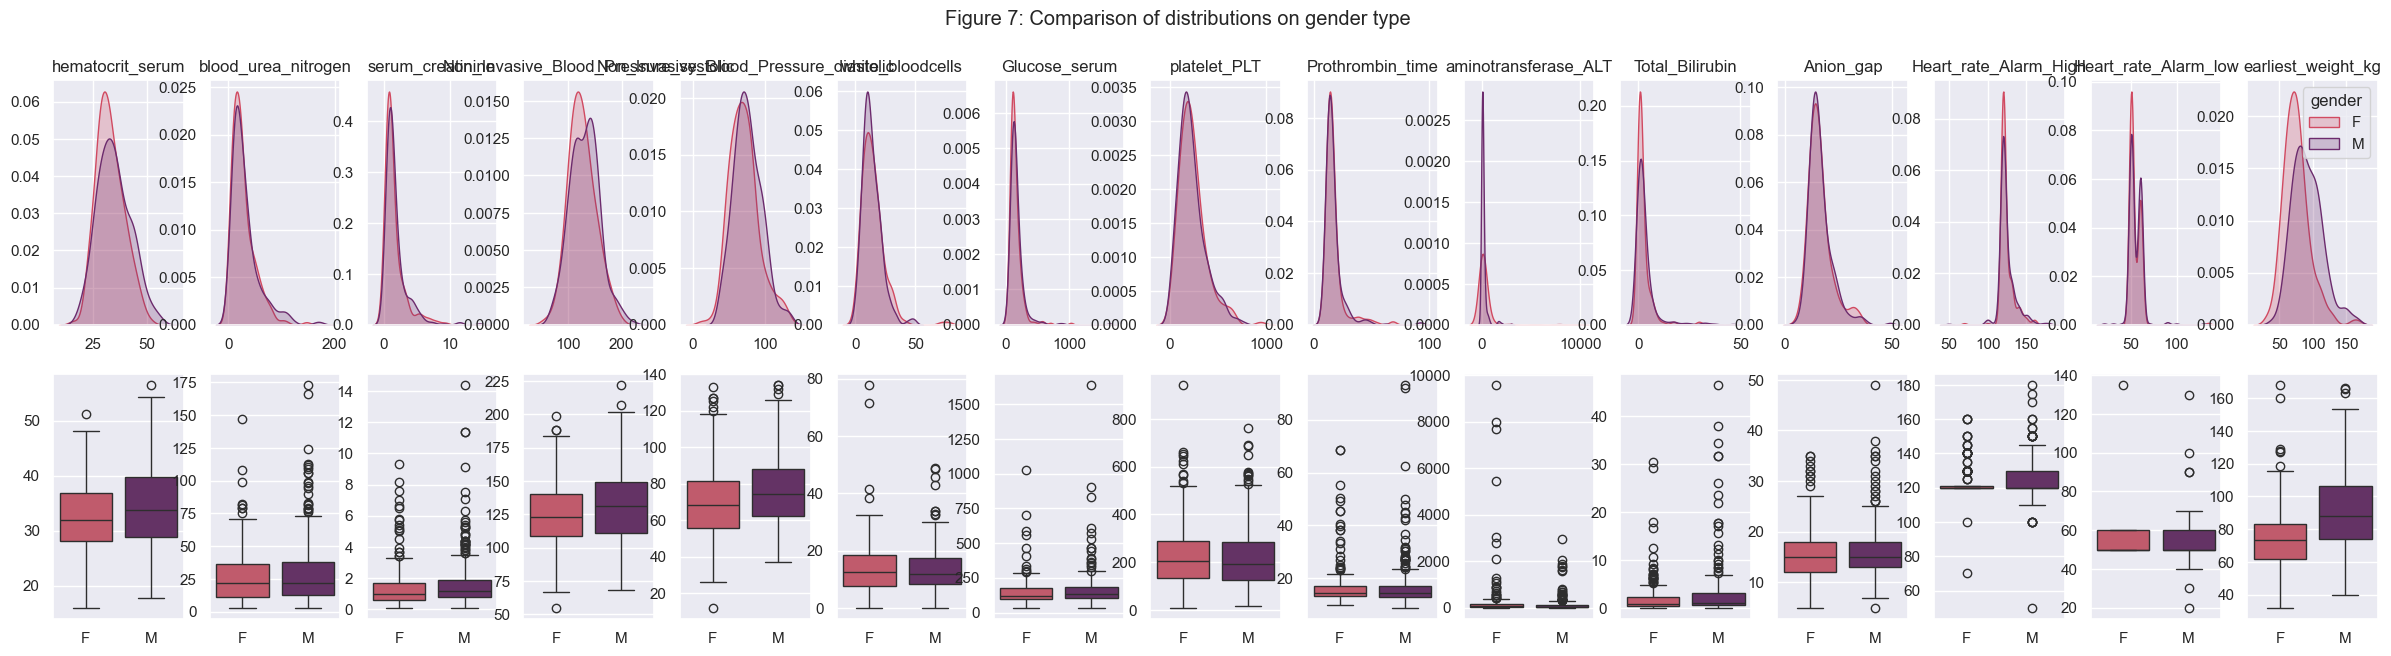

{'hematocrit_serum': 0.00830953729345551,
 'blood_urea_nitrogen': 0.10919216949901758,
 'serum_creatinine': 0.17082988684408193,
 'Non_Invasive_Blood_Pressure_systolic': 0.0495214283141,
 'Non_Invasive_Blood_Pressure_diastolic': 0.009057615935505721,
 'white_bloodcells': 0.19287264007115382,
 'Glucose_serum': 0.19561385976610443,
 'platelet_PLT': 0.4655842277725798,
 'Prothrombin_time': 0.8538822513176509,
 'aminotransferase_ALT': 0.016190611012735952,
 'Total_Bilirubin': 0.08634087937365116,
 'Anion_gap': 0.7144082463424588,
 'Heart_rate_Alarm_High': 0.45464109257678986,
 'Heart_rate_Alarm_low': 0.24697259941144742,
 'earliest_weight_kg': 2.7632652313721904e-14}

In [35]:
plot_mean_difference(df_clean, 'gender', "Figure 7: Comparison of distributions on gender type", [palette[-4], palette[-1]])

Statistically, features with significant difference (p<0.05) in gender are 

- `hematocrit_serum`
- `Non_Invasive_Blood_Pressure_systolic`
- `Non_Invasive_Blood_Pressure_diastolic`
- `aminotransferase_ALT`
- `earliest_weight_kg`.

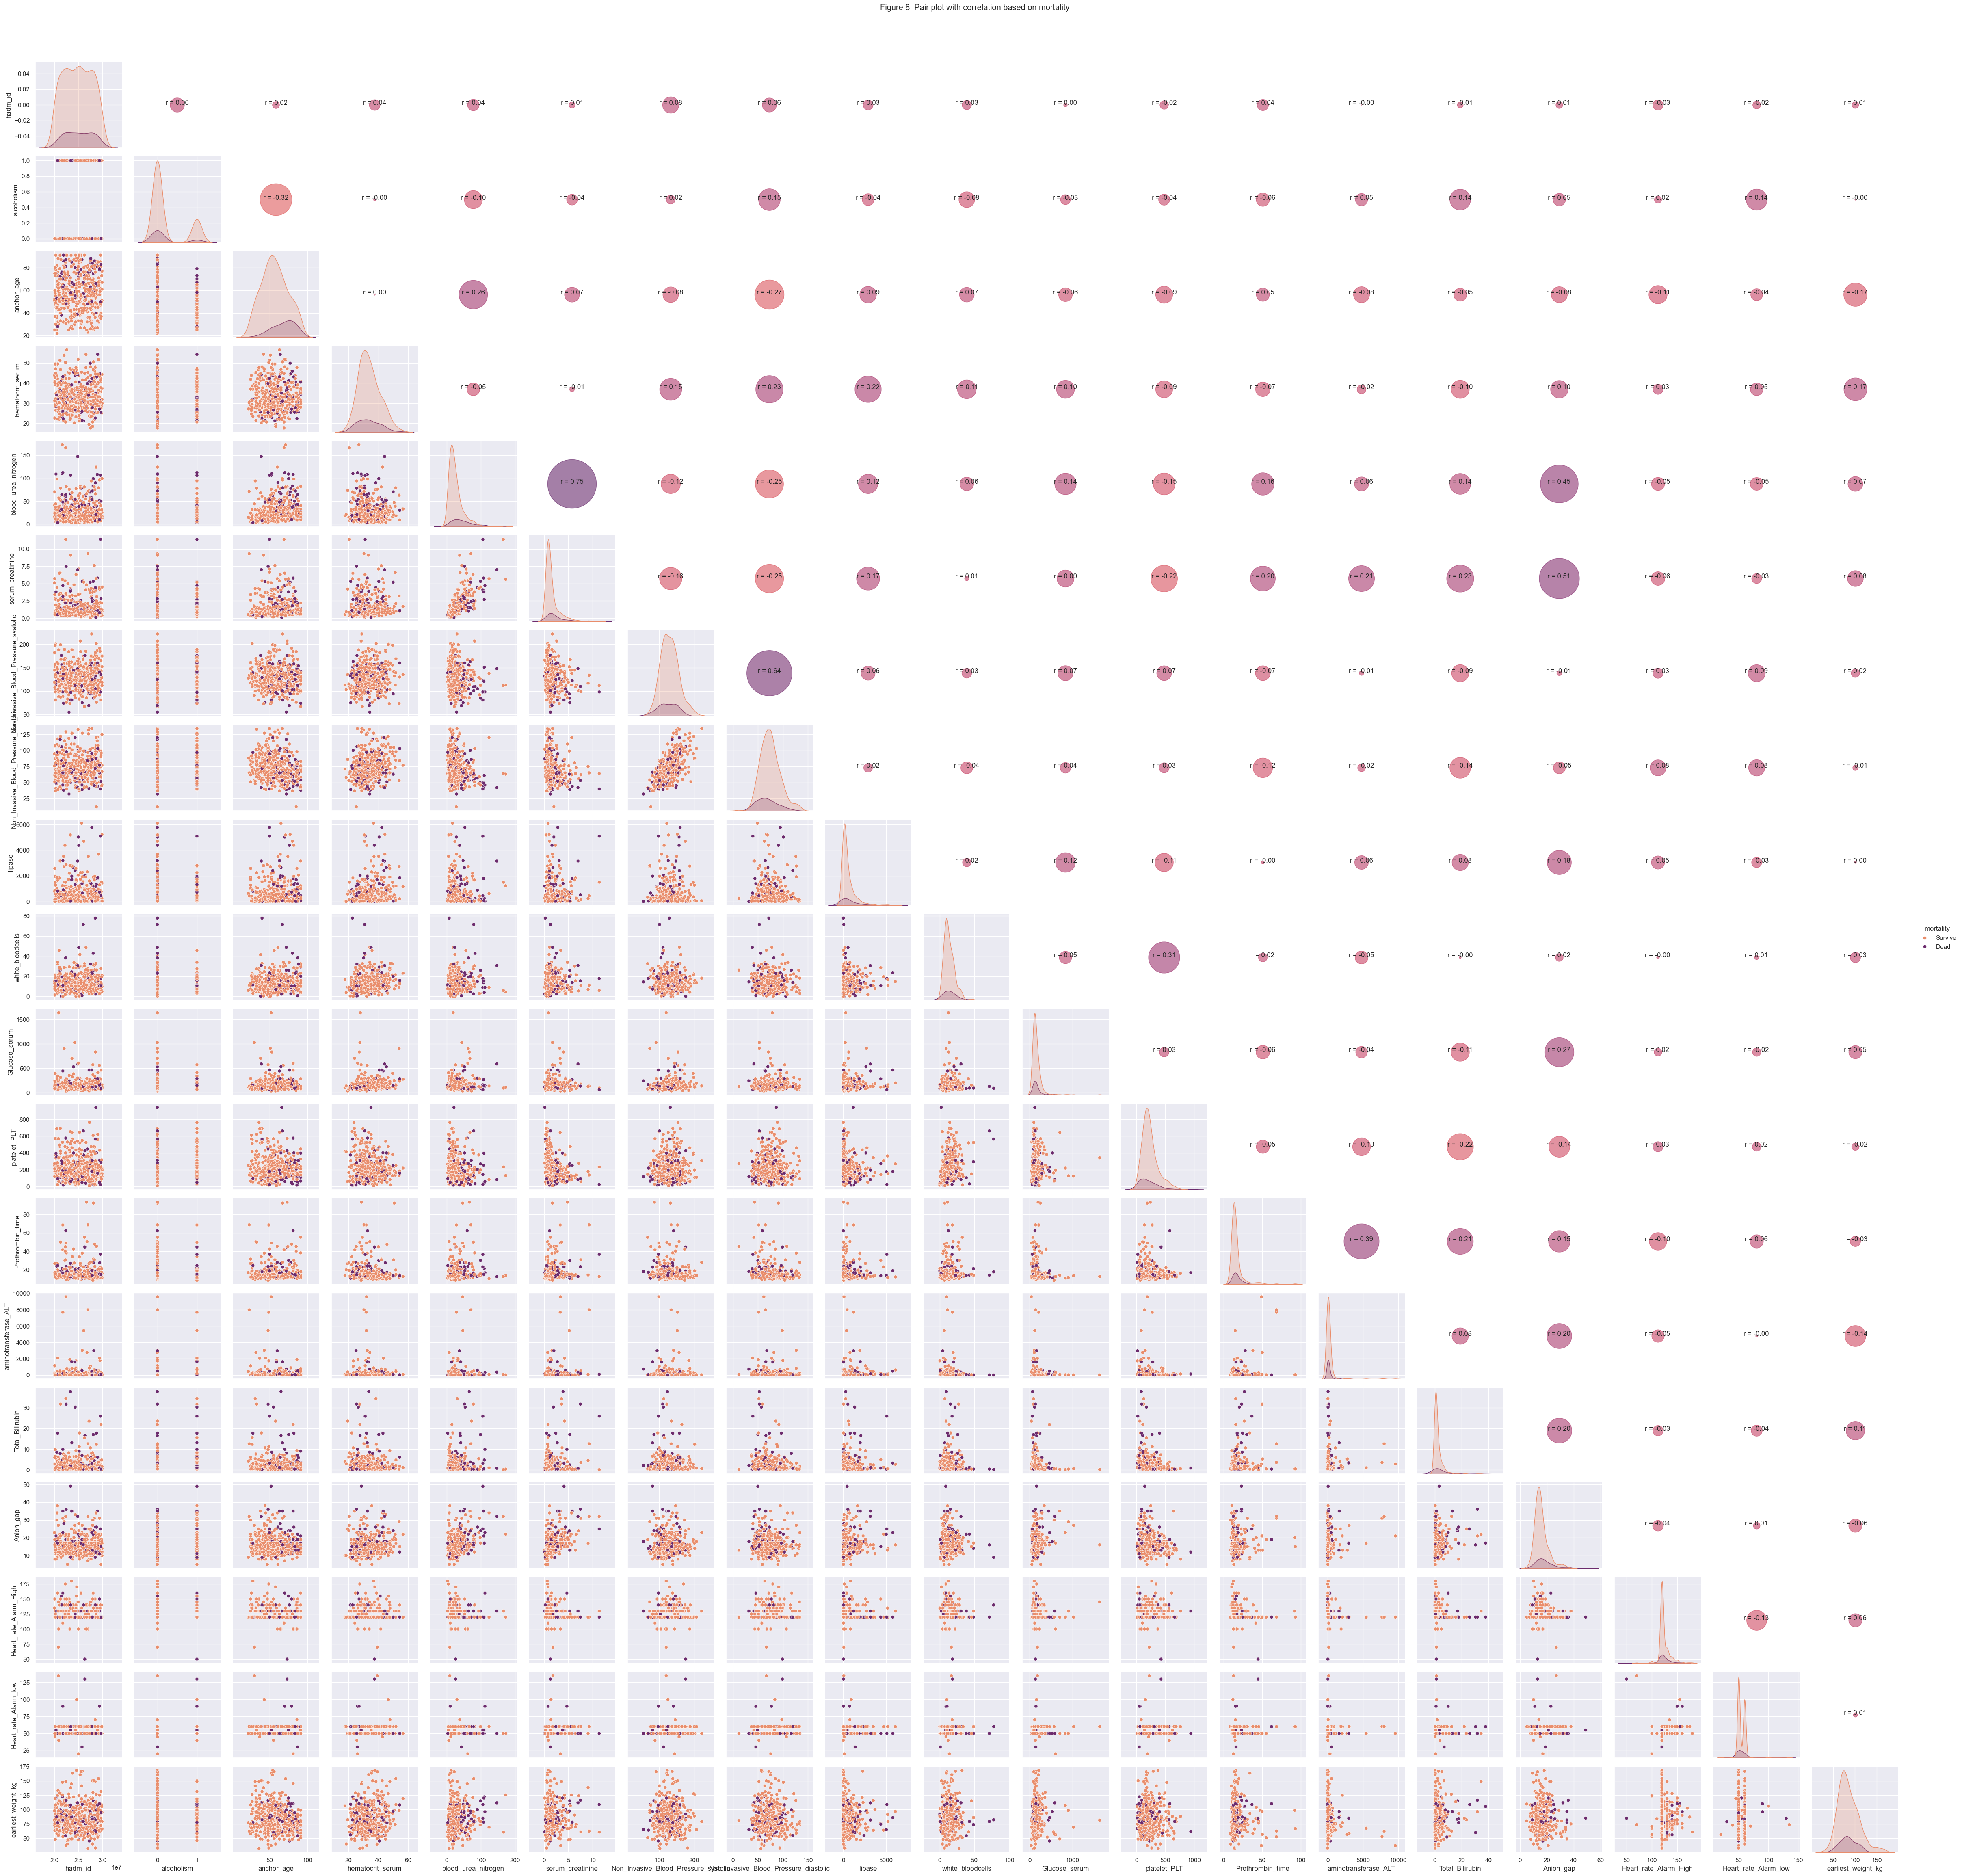

In [36]:
pair_plot(df_clean.drop(['deathtime'], axis=1).dropna(), 
          'mortality', 
          "Figure 8: Pair plot with correlation based on mortality", 
          [palette[0], palette[-1]])